In [2]:
import utils
from utils import IpLoc, TestCircuit
import time
import numpy as np
from pathlib import Path
%matplotlib inline

In [3]:
# Create the initial IpLoc data
chip_resources_path = Path('ZYNQ7000.json')
location_data = IpLoc(chip_resources_path)

In [6]:
# Create the initial IpLoc data
test_circuit_path = Path('IP_configure_OnlyRO.yaml')
test_circuit = TestCircuit(test_circuit_path)

There are a total of 1 IPs in this design.


In [7]:
test_circuit.circuit

{'RO0': {'IP': 'RO',
  'IP_specs': {'first_instance_name': 'design_1_i/RO0/inst/RO[@inst1].nolabel_line95/LUT6_2_inst',
   'other_instance_names': 'design_1_i/RO0/inst/RO[@inst1].notGate[@inst2].Inverter/LUT6_inst',
   'feedback_signal': 'design_1_i/RO0/inst/RO[@inst1].notGate[0].Inverter/out_sig',
   'Num_Oscillators': 32,
   'Num_Stages': 3}}}

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 3571.62it/s]


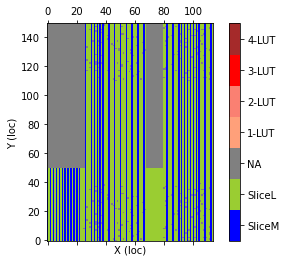

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 3008.03it/s]


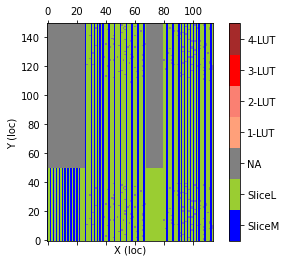

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 3363.37it/s]


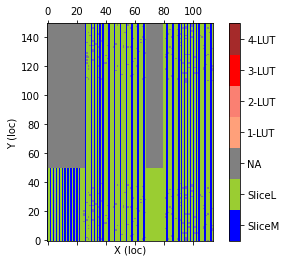

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 2933.33it/s]


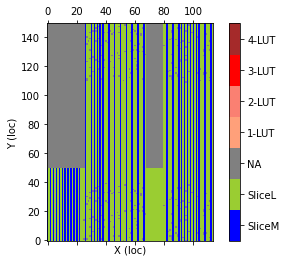

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 3683.44it/s]


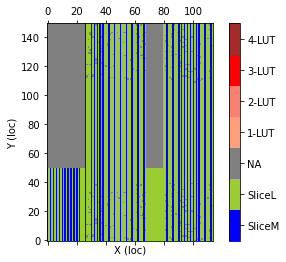

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 2332.73it/s]


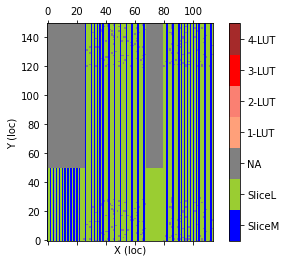

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 2431.88it/s]


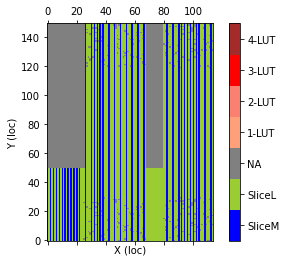

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 3178.01it/s]


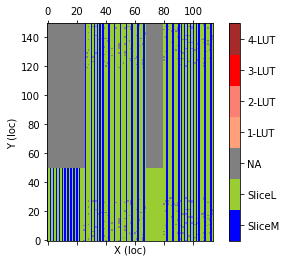

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 3361.72it/s]


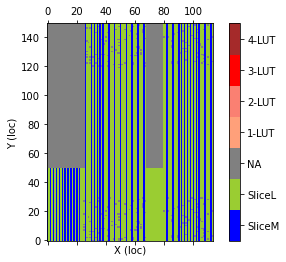

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 2859.10it/s]


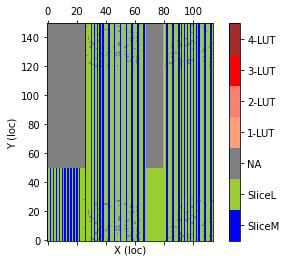

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 5714.65it/s]


In [6]:
#Y direction 
resolutions = [110, 120]#[1, 2, 5, 10, 20, 50, 80, 140]
num_per_resolutions = 5 
for length in resolutions:
    for bit_num in range(num_per_resolutions):
        blocked_resources = location_data.copy()
        for item in test_circuit.circuit.keys():
            test_circuit.locations[item] = blocked_resources.copy()
            if test_circuit.circuit[item]['IP'] == 'RO':
                Num_Oscillators = test_circuit.circuit[item]['IP_specs']['Num_Oscillators']
                Num_Stages = test_circuit.circuit[item]['IP_specs']['Num_Stages']
                max_x = test_circuit.locations[item].max_x
                max_y = test_circuit.locations[item].max_y
                for i in range(Num_Oscillators):
                    x = np.random.randint(max_x)
                    y = np.random.randint(max_y - length)
                    while (test_circuit.locations[item].remaining_resources[x, y] != 0 or test_circuit.locations[item].remaining_resources[x, y + length] != 0):
                        x = np.random.randint(max_x)
                        y = np.random.randint(max_y - length)
                    y_pos = [y, y, y, y + length]
                    slice_resources = [test_circuit.locations[item]._lut_a, test_circuit.locations[item]._lut_b, test_circuit.locations[item]._lut_c, test_circuit.locations[item]._lut_a]
                    test_circuit.locations[item].remaining_resources[x, y] = 3
                    test_circuit.locations[item].remaining_resources[x, y + length] = 1
                    for j, k in zip(slice_resources, y_pos):
                        j[x, k] = i
                test_circuit.locations[item] = utils.check_and_propose(test_circuit.locations[item], 'L')
                blocked_resources = utils.IpLoc.block_resource(blocked_resources, test_circuit.locations[item])
        blocked_resources.plot_layout()
        utils.RO_xdc(test_circuit, slice_type='L', outputfile=f'RO_resolution_{length}_num_{bit_num}.XDC', json_output=f'RO_resolution_{length}_num_{bit_num}.json')

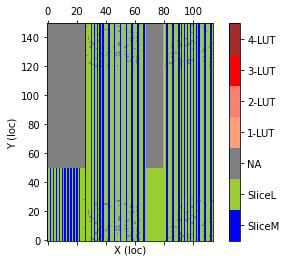

In [7]:
blocked_resources.plot_layout()

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 1019.03it/s]


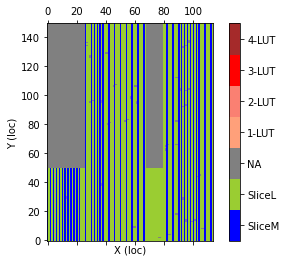

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 1026.22it/s]


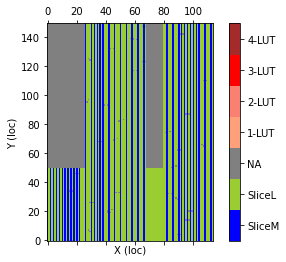

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 1278.81it/s]


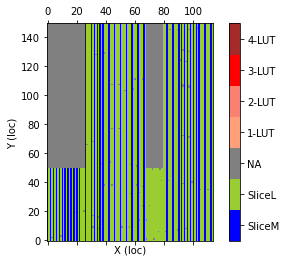

100%|███████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 867.22it/s]


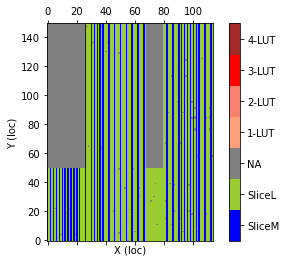

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 1149.38it/s]


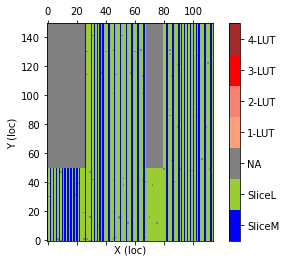

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 1224.84it/s]


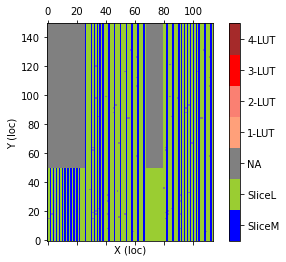

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 1053.05it/s]


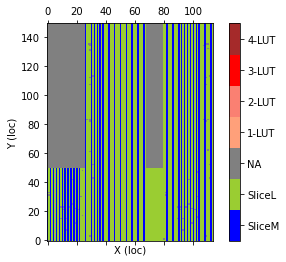

100%|███████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 789.69it/s]


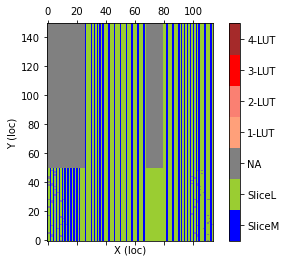

100%|███████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 853.90it/s]


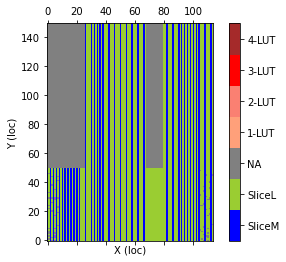

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 3295.43it/s]


In [8]:
# X direction
resolutions = [1, 2, 5, 10, 20, 50, 80, 100, 105]
num_per_resolutions = 1 
for length in resolutions:
    for bit_num in range(num_per_resolutions):
        blocked_resources = location_data.copy()
        for item in test_circuit.circuit.keys():
            test_circuit.locations[item] = blocked_resources.copy()
            if test_circuit.circuit[item]['IP'] == 'RO':
                Num_Oscillators = test_circuit.circuit[item]['IP_specs']['Num_Oscillators']
                Num_Stages = test_circuit.circuit[item]['IP_specs']['Num_Stages']
                max_x = test_circuit.locations[item].max_x
                max_y = test_circuit.locations[item].max_y
                for i in range(Num_Oscillators):
                    x = np.random.randint(max_x - length)
                    y = np.random.randint(max_y)
                    while (test_circuit.locations[item].remaining_resources[x, y] != 0 or test_circuit.locations[item].remaining_resources[x + length, y] != 0):
                        x = np.random.randint(max_x - length)
                        y = np.random.randint(max_y)
                    x_pos = [x, x, x, x + length]
                    slice_resources = [test_circuit.locations[item]._lut_a, test_circuit.locations[item]._lut_b, test_circuit.locations[item]._lut_c, test_circuit.locations[item]._lut_a]
                    test_circuit.locations[item].remaining_resources[x, y] = 3
                    test_circuit.locations[item].remaining_resources[x + length, y] = 1
                    for j, k in zip(slice_resources, x_pos):
                        j[k, y] = i
                test_circuit.locations[item] = utils.check_and_propose(test_circuit.locations[item], 'L')
                blocked_resources = utils.IpLoc.block_resource(blocked_resources, test_circuit.locations[item])
        blocked_resources.plot_layout()
        utils.RO_xdc(test_circuit, slice_type='L', outputfile=f'RO_resolution_{length}_num_{bit_num}_H.XDC', json_output=f'RO_resolution_{length}_num_{bit_num}_H.json')